In [1]:
import manga109api
import pandas as pd
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
def draw_rectangle(img, x0, y0, x1, y1, annotation_type):
    assert annotation_type in ["body", "face", "frame", "text"]
    color = {"body": "#258039", "face": "#f5be41",
             "frame": "#31a9b8", "text": "#cf3721"}[annotation_type]
    draw = ImageDraw.Draw(img)
    draw.rectangle([x0, y0, x1, y1], outline=color, width=10)

In [3]:
def get_all_images_and_annotations(manga109_root_dir, book):
    p = manga109api.Parser(root_dir=manga109_root_dir)
    annotations = p.get_annotation(book=book)
    
    image_data = []
    for page_index in range(len(annotations["page"])):
        img_path = p.img_path(book=book, index=page_index)
        for annotation_type in ["body", "face", "frame", "text"]:
            rois = annotations["page"][page_index].get(annotation_type, [])
            for roi in rois:
                image_data.append({
                    "image_path": img_path,
                    "annotation": annotation_type,
                    "roi": roi
                })
    
    return pd.DataFrame(image_data)

In [4]:
manga109_root_dir = "../Manga109/Manga109_released_2023_12_07"
book = "ARMS"

# Get all images and annotations
df = get_all_images_and_annotations(manga109_root_dir, book)

In [29]:
df.shape

(2403, 3)

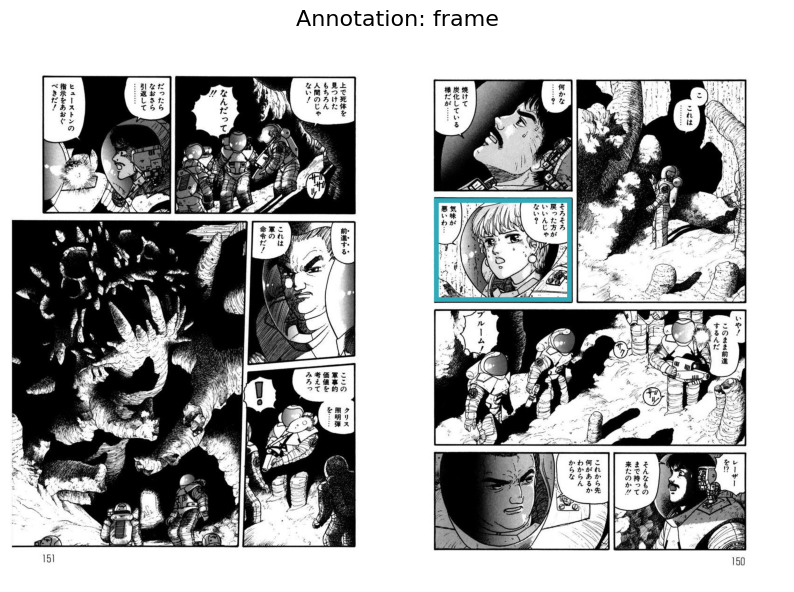

In [5]:
# Pick a random entry
random_entry = df.sample(n=1).iloc[0]
img_path = random_entry["image_path"]
roi = random_entry["roi"]
annotation_type = random_entry["annotation"]

# Load the image
img = Image.open(img_path)

# Draw single annotation
draw_rectangle(img, roi["@xmin"], roi["@ymin"], roi["@xmax"], roi["@ymax"], annotation_type)

# Display the image with annotation
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title(f"Annotation: {annotation_type}", fontsize=16)  # Add title with annotation type
plt.show()